## Phonepe Analysis

For ease of Use I have created a excel file after collecting the data from all the json files. As there are multiple json files containing data.

In [40]:
# Extacting neccesary data from json file into Python pandas dataframe
import os
import json
import pandas as pd

# def extract_registered_users(json_data):
#     return json_data.get("data", {}).get("aggregated", {}).get("registeredUsers")

# def get_year_and_quarter(file_name):
#     # Extract year and quarter from the file name
#     parts = file_name.split('_')
#     if len(parts) == 2:
#         year, quarter = parts
#         return int(year), quarter

# def process_json_file(file_path):
#     with open(file_path, 'r') as file:
#         json_data = json.load(file)

#     registered_users = extract_registered_users(json_data)
#     if registered_users is not None:
#         year, quarter = get_year_and_quarter(os.path.basename(file_path))
#         return year, quarter[:2], registered_users

# def collect_registered_users(folder_path):
#     data = []
#     for file_name in os.listdir(folder_path):
#         if file_name.endswith('.json'):
#             file_path = os.path.join(folder_path, file_name)
#             result = process_json_file(file_path)
#             if result:
#                 data.append(result)

#     return data

# # Replace 'path/to/your/folder' with the actual path to your folder
# folder_path =  r'C:\Users\shaik\Desktop\Phonepe Data'
# data = collect_registered_users(folder_path)

# Create a dataframe
# df = pd.DataFrame(data, columns=['Year', 'Quarter', 'RegisteredUsers'])

df = pd.read_excel('Phonepe.xlsx',index_col=0)

# Display the dataframe
df.tail()


,Year,Quarter,RegisteredUsers
18,2022,Q3,414324881
19,2022,Q4,433947940
20,2023,Q1,453886185
21,2023,Q2,472369901
22,2023,Q3,491434385


In [41]:
import matplotlib.pyplot as plt
df_grouped = df.groupby('Year')['RegisteredUsers'].sum().reset_index()

# Create a new column for registered users in millions
df_grouped['RegisteredUsersMillions'] = df_grouped['RegisteredUsers'] / 1e6



In [42]:
df_filtered = df[(df['Quarter'] == 'Q4') | ((df['Quarter'] == 'Q3') & (df['Year'] == 2023))]


# Create a new column for registered users in millions
df_filtered['RegisteredUsersMillions'] = df_filtered['RegisteredUsers'] / 1e6
df_filtered = df_filtered.drop(['Quarter', 'RegisteredUsers'], axis=1)


C:\Users\shaik\AppData\Local\Temp\ipykernel_27628\4177744659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RegisteredUsersMillions'] = df_filtered['RegisteredUsers'] / 1e6


In [43]:
df_filtered.reset_index(inplace=True)

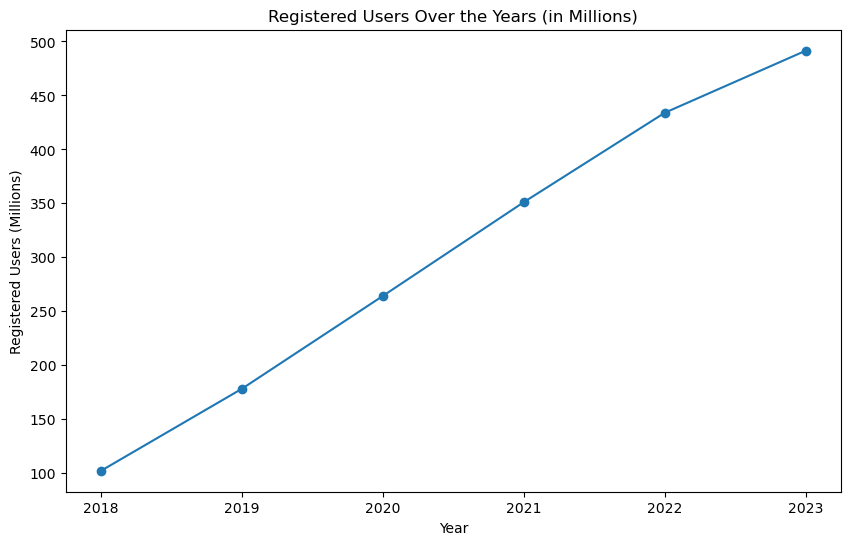

In [44]:
# Registered Users Over the Years
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Year'], df_filtered['RegisteredUsersMillions'], marker='o')
plt.title('Registered Users Over the Years (in Millions)')
plt.xlabel('Year')
plt.ylabel('Registered Users (Millions)')

plt.show()

Mean Squared Error on Test Data: 244.97831498298524
[ 499.8451264  576.2727085  652.7002906  729.1278727  805.5554548
  881.9830369  958.410619  1034.8382011]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


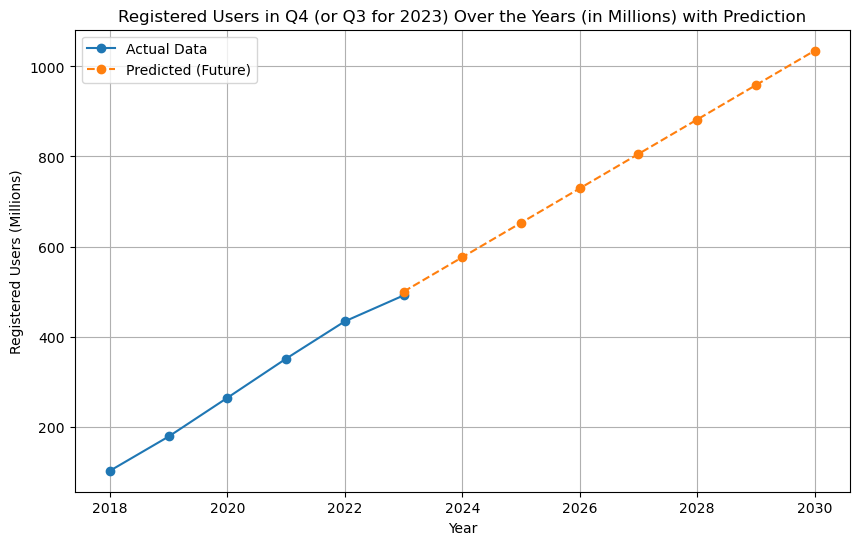

In [45]:
# Creating a Simple Timeseries Model to Predict the Growth Rate of Registered Users Using Simple Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df_filtered[['Year']], df_filtered['RegisteredUsersMillions'], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Predict values until 2030
future_years = np.arange(2023, 2031).reshape(-1, 1)
future_predictions = model.predict(future_years)
print(future_predictions)
# Plotting
plt.figure(figsize=(10, 6))

# Plot actual data till 2023
plt.plot(df_filtered['Year'], df_filtered['RegisteredUsersMillions'], marker='o', label='Actual Data')



# Plot predicted data for future years
plt.plot(future_years, future_predictions, marker='o', linestyle='dashed', label='Predicted (Future)')

plt.title('Registered Users in Q4 (or Q3 for 2023) Over the Years (in Millions) with Prediction')
plt.xlabel('Year')
plt.ylabel('Registered Users (Millions)')
plt.legend()
plt.grid(True)
plt.show()

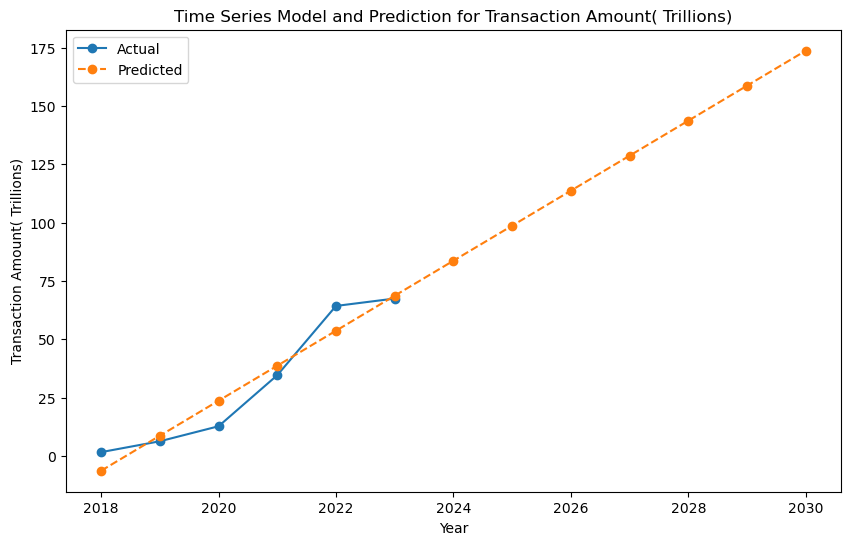

In [46]:
# Creating a Multiple Regression Model Using Variables like Number of transactions(Billions), Transaction Amount( Trillions), No.of Internet users (millions), Market value(approx) (Billions) Registered Users (millions) Etc 
# to predict the Growth rate of the Registered Users
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Your DataFrame
data = {
    'Year': [2018, 2019, 2020, 2021, 2022, 2023],
    'Number of transactions(Billions)': [1.08, 4.08, 6.98, 19.29, 39.30, 45.24],
    'Transaction Amount( Trillions)': [1.62, 6.28, 12.71, 34.60, 64.27, 67.44],
    'No.of Internet users (millions)': [499.93, 644.51, 757.96, 900.32, 1060.08, 1240.69],
    'Market value(approx) (Billions)': [3, 7, 8, 10, 12, 14],
    'Registered Users (millions)': [102.3, 178.3, 264.3, 351.2, 433.9, 491.4]
}

df = pd.DataFrame(data)

# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Fit a time series model
model = sm.OLS(df['Transaction Amount( Trillions)'], sm.add_constant(df.index)).fit()

# Predict values until 2030
future_years = pd.DataFrame({'Year': range(2018, 2031)})
future_years.set_index('Year', inplace=True)
future_predictions = model.predict(sm.add_constant(future_years.index))

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(df.index, df['Transaction Amount( Trillions)'], marker='o', label='Actual')

# Plot predicted data
plt.plot(future_years.index, future_predictions, marker='o', linestyle='dashed', label='Predicted')

plt.xlabel('Year')
plt.ylabel('Transaction Amount( Trillions)')
plt.legend()

plt.title('Time Series Model and Prediction for Transaction Amount( Trillions)')
plt.show()


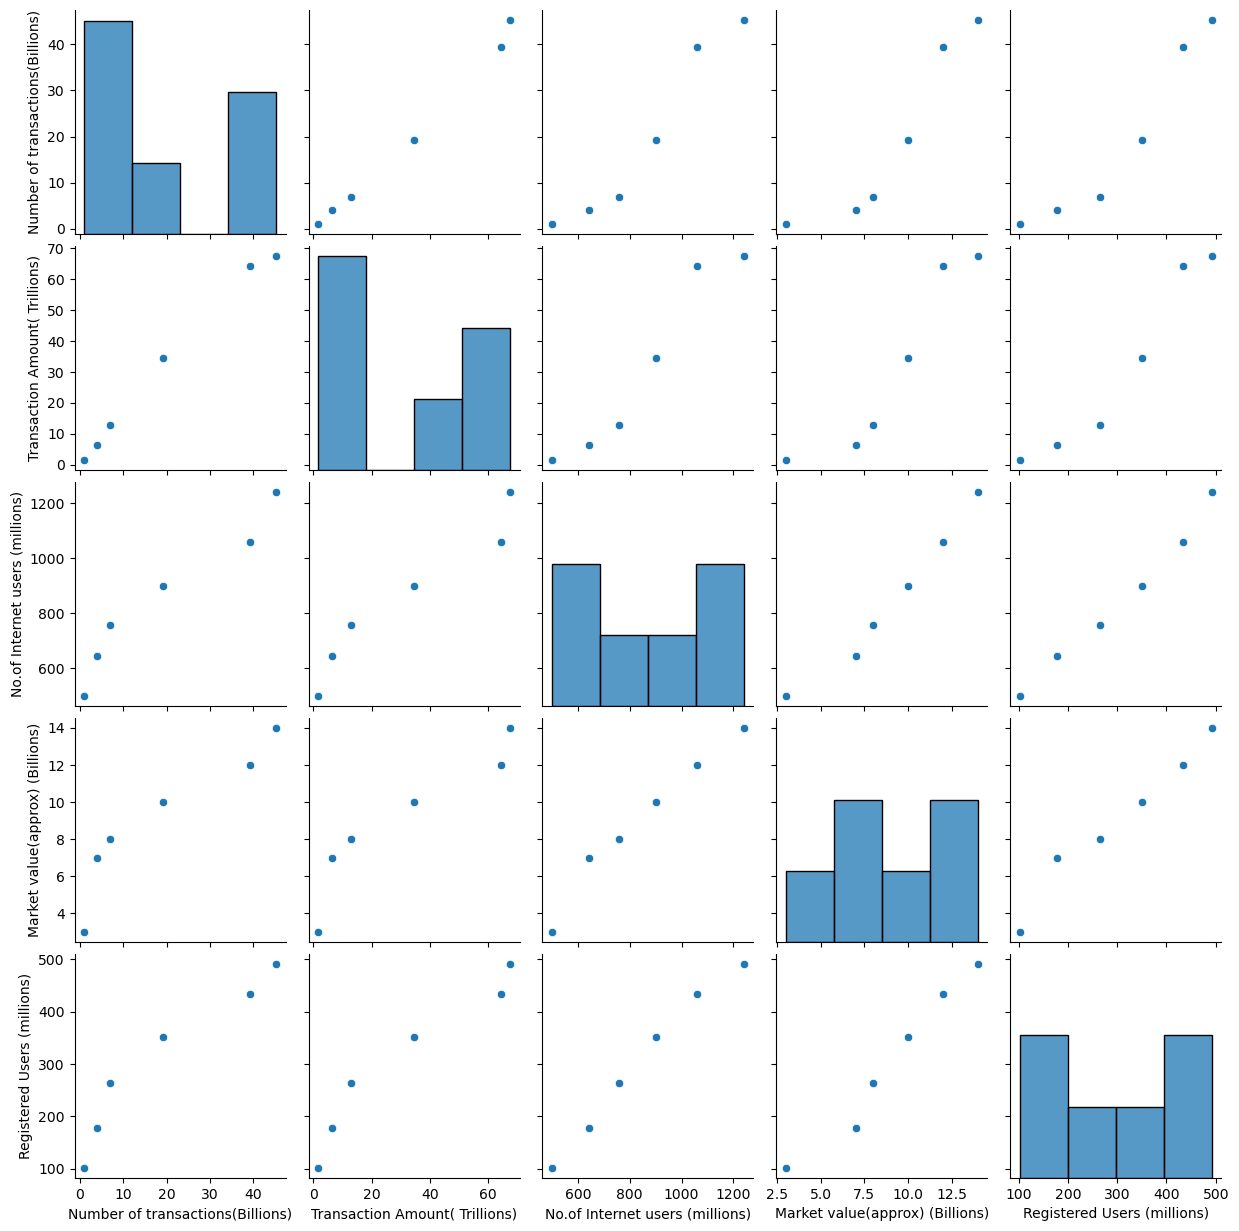

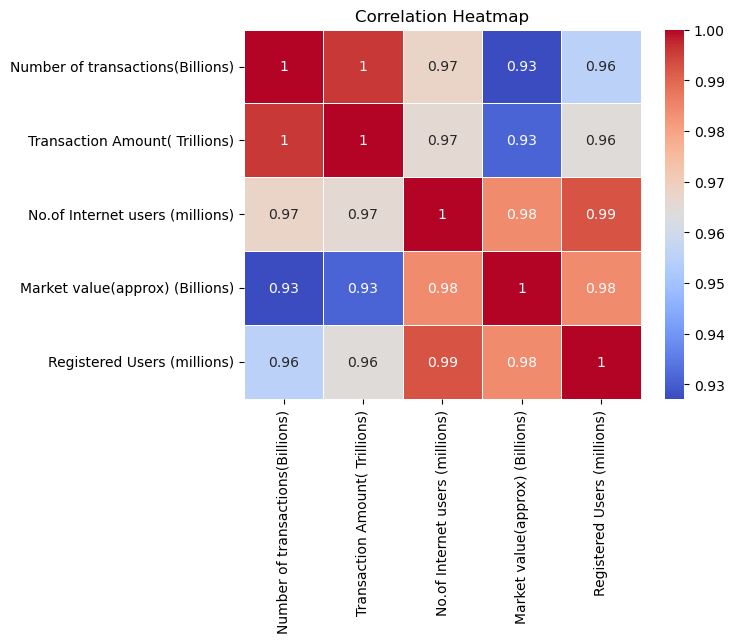

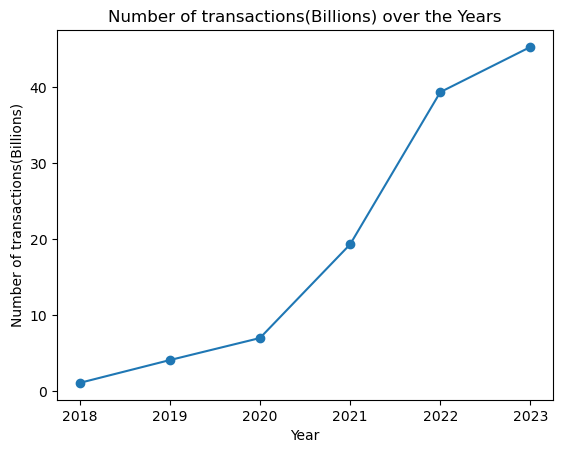

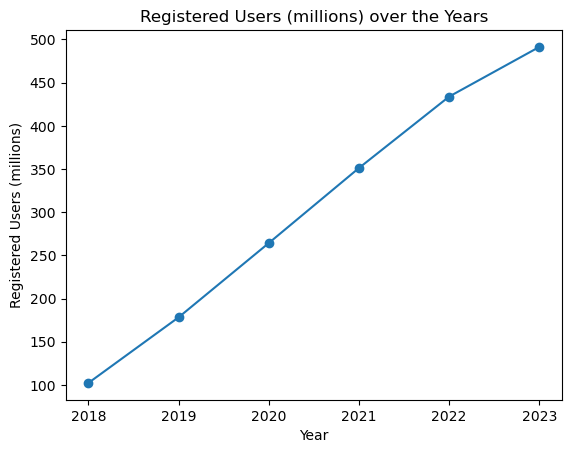

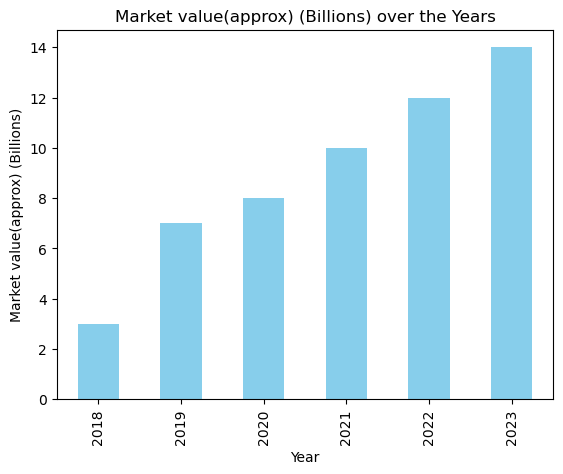

In [47]:
# Exploratory Data Analysis of different Variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame
data = {
    'Year': [2018, 2019, 2020, 2021, 2022, 2023],
    'Number of transactions(Billions)': [1.08, 4.08, 6.98, 19.29, 39.30, 45.24],
    'Transaction Amount( Trillions)': [1.62, 6.28, 12.71, 34.60, 64.27, 67.44],
    'No.of Internet users (millions)': [499.93, 644.51, 757.96, 900.32, 1060.08, 1240.69],
    'Market value(approx) (Billions)': [3, 7, 8, 10, 12, 14],
    'Registered Users (millions)': [102.3, 178.3, 264.3, 351.2, 433.9, 491.4]
}

df = pd.DataFrame(data)

# Set 'Year' as the index
df.set_index('Year', inplace=True)

# Pairplot for numeric variables
sns.pairplot(df)
plt.show()

# Heatmap for correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Line plot for 'Number of transactions(Billions)'
df['Number of transactions(Billions)'].plot(marker='o')
plt.title('Number of transactions(Billions) over the Years')
plt.xlabel('Year')
plt.ylabel('Number of transactions(Billions)')
plt.show()

# Line plot for 'Registered Users (millions)'
df['Registered Users (millions)'].plot(marker='o')
plt.title('Registered Users (millions) over the Years')
plt.xlabel('Year')
plt.ylabel('Registered Users (millions)')
plt.show()

# Bar plot for 'Market value(approx) (Billions)'
df['Market value(approx) (Billions)'].plot(kind='bar', color='skyblue')
plt.title('Market value(approx) (Billions) over the Years')
plt.xlabel('Year')
plt.ylabel('Market value(approx) (Billions)')
plt.show()
